# Import

In [2]:
import seaborn as sns
from pandas import melt, read_csv

# Read CSV

In [3]:
df = read_csv(
    "results/test.csv",
    dtype={
        "N_tr": "category",
        "N_te": "category",
        "M": "category",
        "K_o": "category",
        "K_e": "category",
        # "N_bc": "category",
        "Method": "category",
        "Original model": "category",
        "Elicited model": "category",
    },
)

# Plot

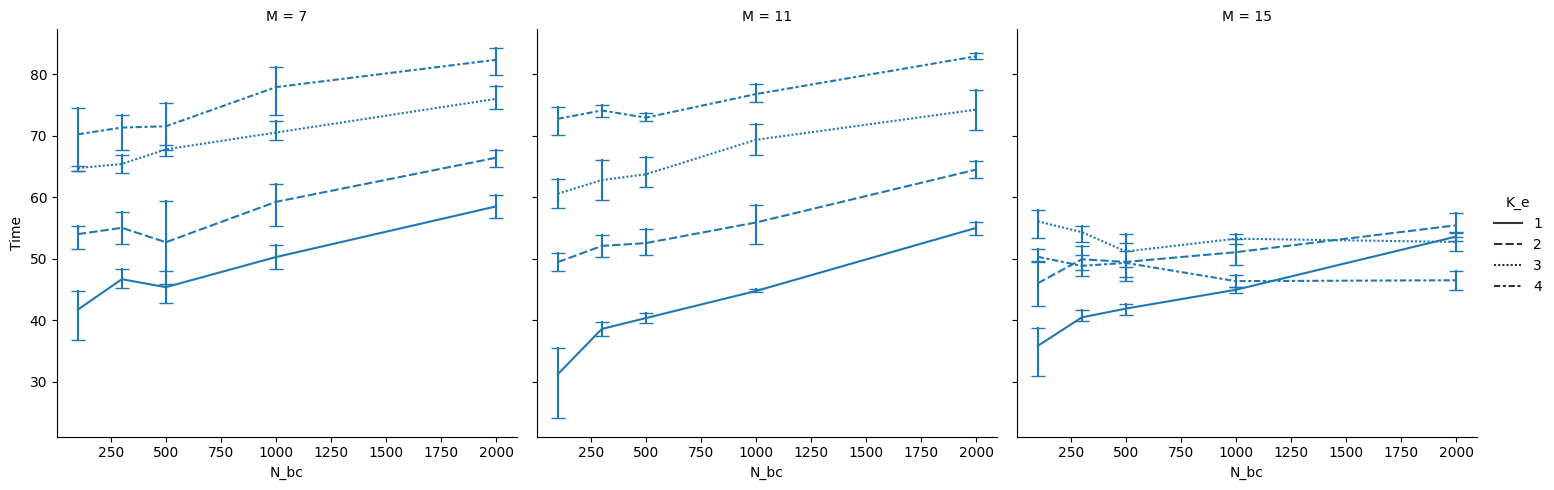

In [4]:
sns.relplot(
    data=df,
    x="N_bc",
    y="Time",
    style="K_e",
    col="M",
    # row_order=["1", "2", "3", "4"],
    col_order=["7", "11", "15"],
    kind="line",
    errorbar=("ci", 95),
    err_style="bars",
    err_kws={"capsize": 5},
)

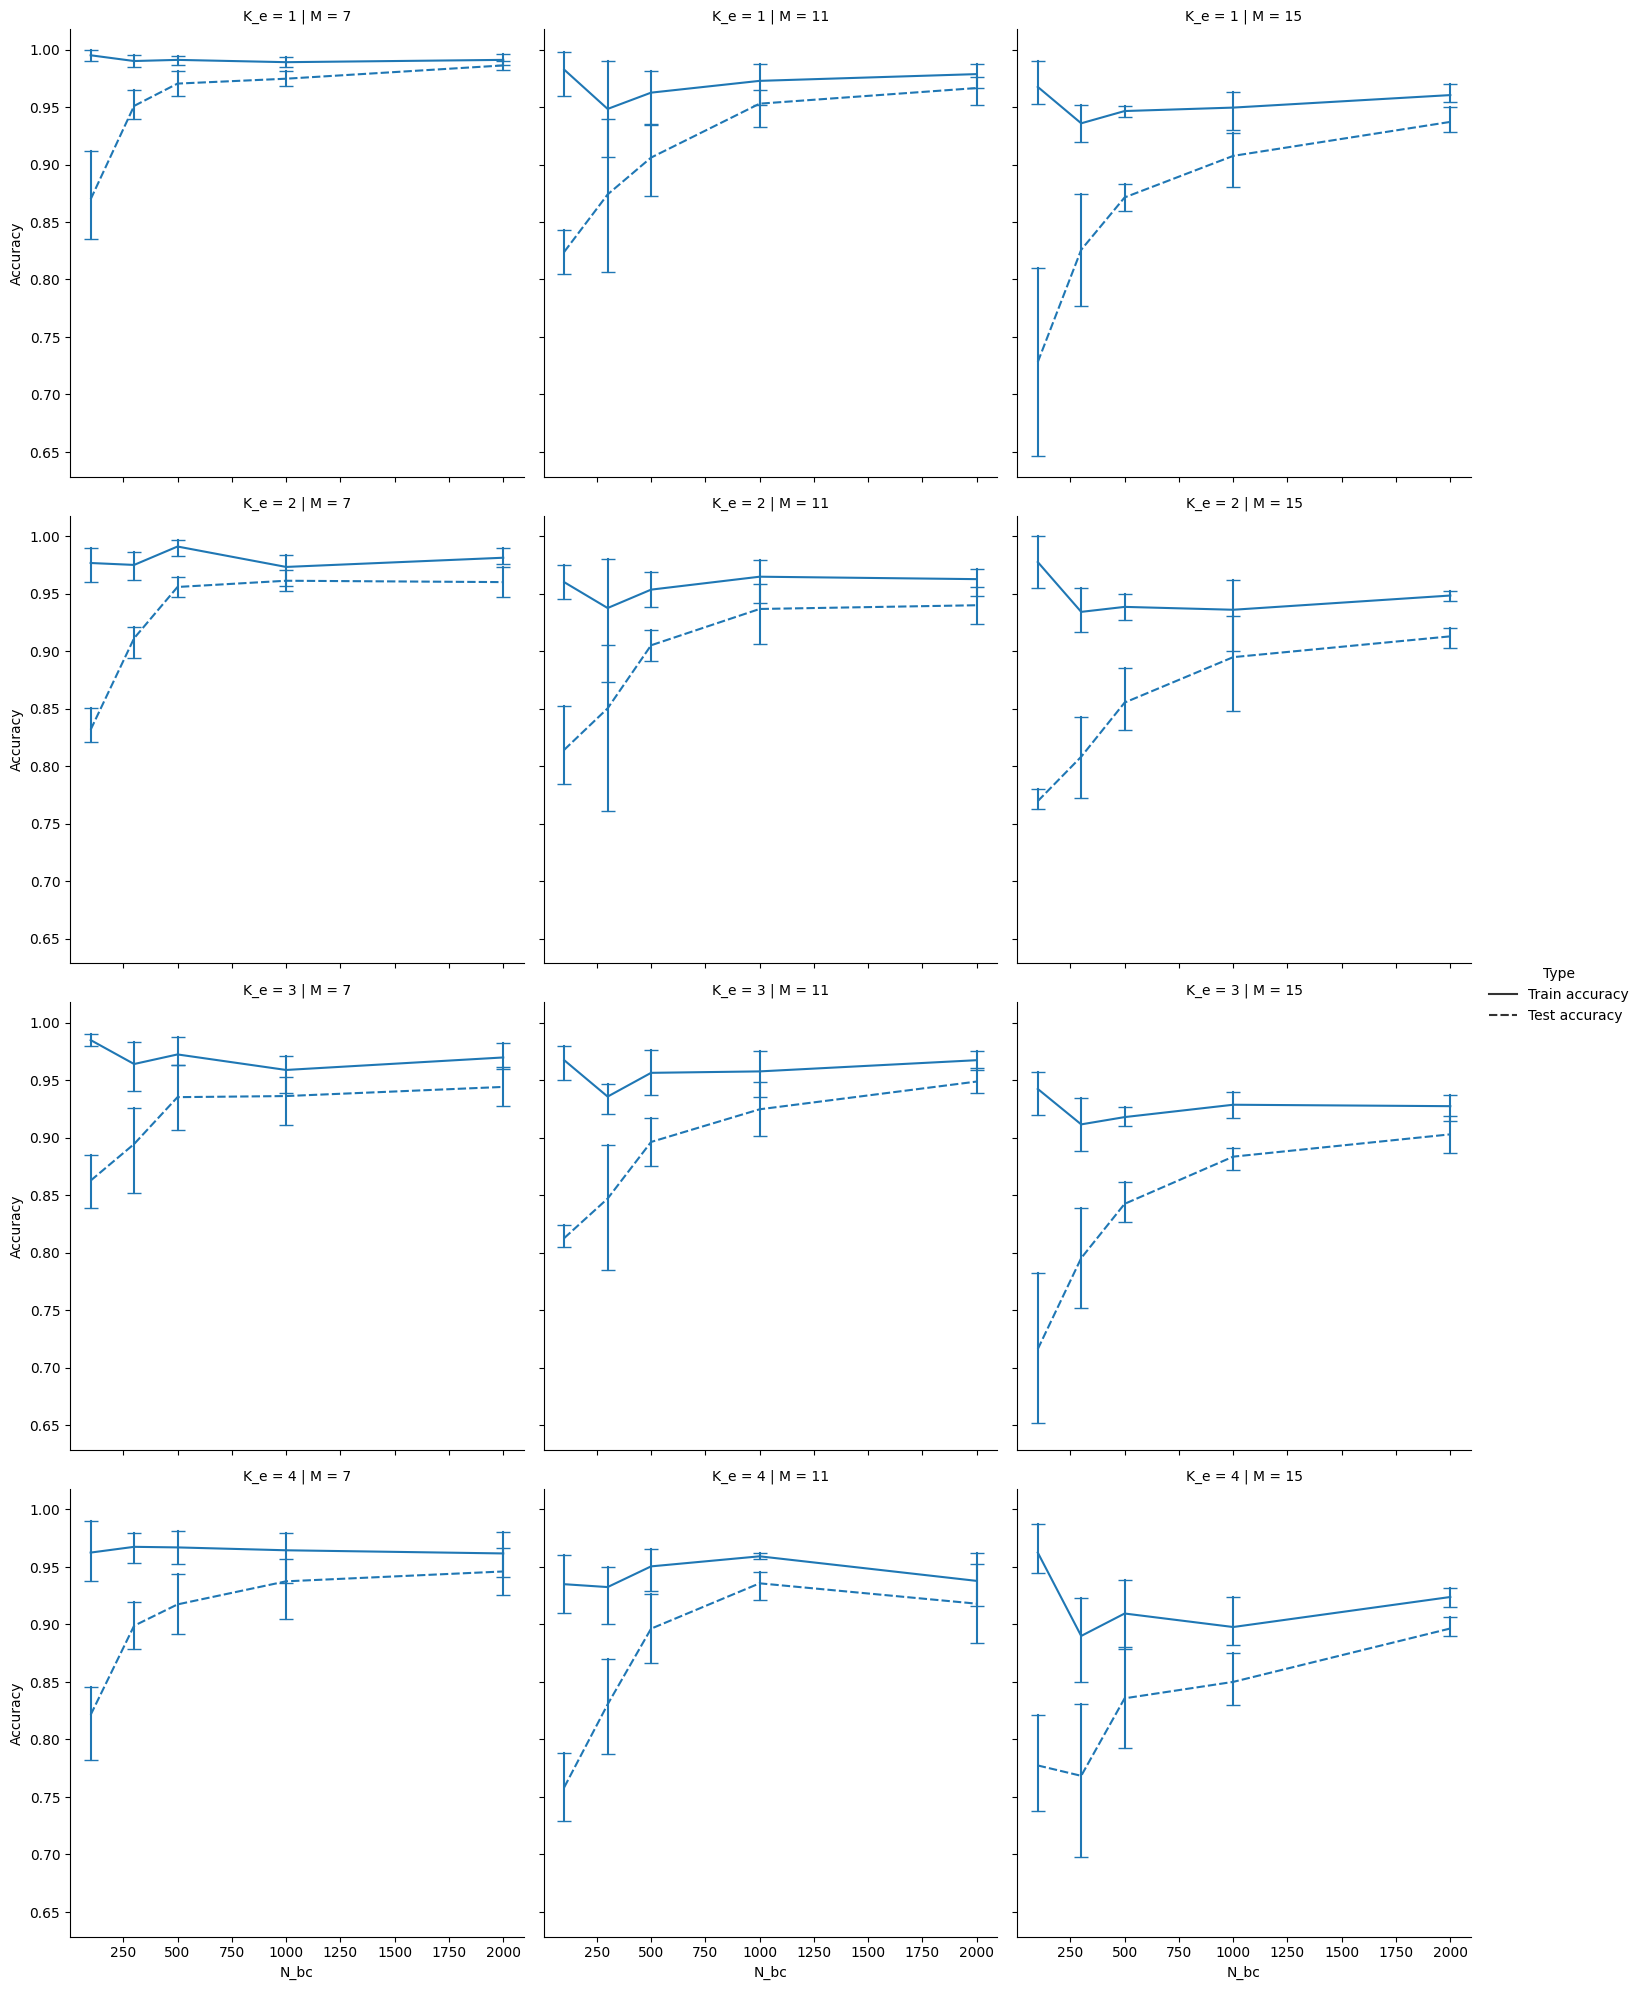

In [29]:
sns.relplot(
    data=melt(df, id_vars=["N_bc", "K_e", "M"], value_vars=["Train accuracy", "Test accuracy"], var_name="Type", value_name="Accuracy"),
    x="N_bc",
    y="Accuracy",
    style="Type",
    row="K_e",
    col="M",
    row_order=["1", "2", "3", "4"],
    col_order=["7", "11", "15"],
    kind="line",
    errorbar=("ci", 95),
    err_style="bars",
    err_kws={"capsize": 5},
)